# Zestaw 13. Generatory liczb losowych i metoda Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

## 1. Generowanie liczb z rozkładu normalnego

<i> Zaimplementuj generator liczb losowych pochodzących z rozkładu normalnego za pomocą metody Boksa-Mullera i zaprezentuj wyniki dla n = 10, 100, 5000 wygenerowanych liczb. Funkcja powinna dodatkowo przyjmować wartość oczekiwaną oraz odchylenie standardowe jako parametry. </i>

In [2]:
def boks_muller(n, mu=0, sigma=1):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    
    x1 = np.sqrt(-2*np.log(1-u1)) * np.cos(2*np.pi*u2)
    x2 = np.sqrt(-2*np.log(1-u1)) * np.sin(2*np.pi*u2)
    
    return sigma*x1 + mu, sigma*x2 + mu

<i>1. Zwizualizuj na wykresie znormalizowany rozkład liczb w 10 równych przedziałach (parametr density = True w metodzie pyplot.hist). Na tym samym wykresie umieść funkcję gęstości prawdopodobieństwa rozkładu normalnego o takich samych parametrach. </i>

In [3]:
def plot_density(n, mu=0, sigma=1):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    normx = np.linspace(mu-3*sigma, mu+3*sigma, 1000)
    ax.plot(normx, sp.norm.pdf(normx, mu, sigma), color="#E7BB41", lw=3)
    
    x = boks_muller(n, mu, sigma)[0]
    ax.hist(x, bins=10, density=True, color="#44BBA4")
    
    ax.set_title(f'n: {n}')
    ax.set_xlabel("x")
    ax.set_ylabel("density")

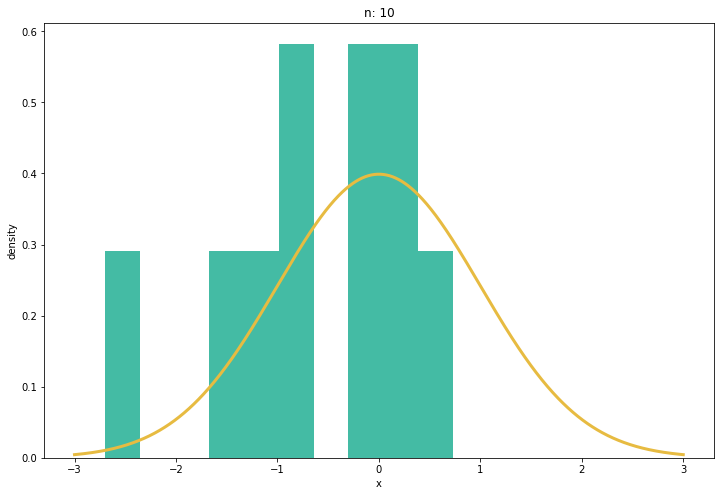

In [4]:
plot_density(10)

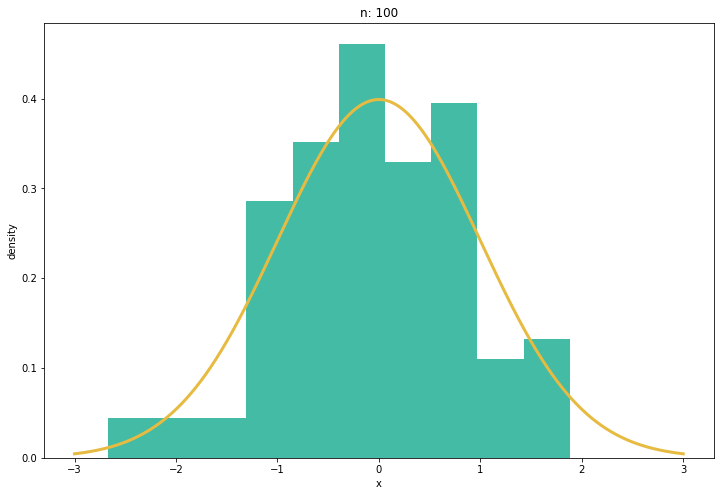

In [5]:
plot_density(100)

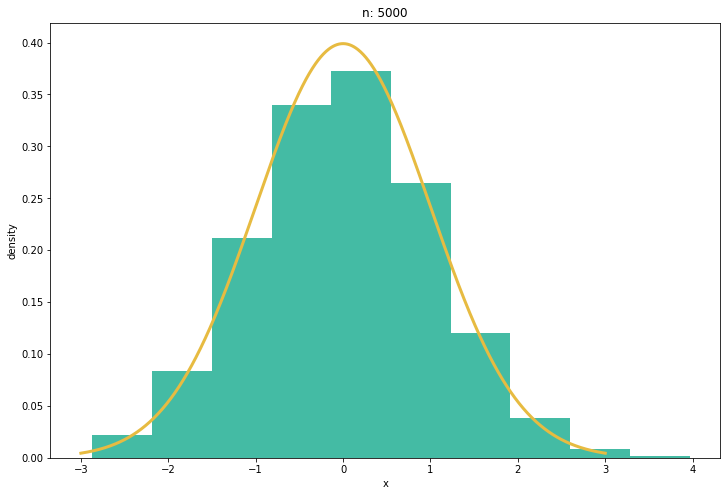

In [6]:
plot_density(5000)

Im większa liczba próbek, tym lepiej możemy zauważyć podobieństwo z gęstością rozkładu Gaussa. Byłoby to jeszcze lepiej widoczne, gdybyśmy zwiększyli liczbę przedziałów.

<i>2. Wykonaj test statystyczny Shapiro-Wilka, przedstaw uzyskaną p-wartość, informację czy hipoteza zerowa została przyjęta/odrzucona dla α = 0,05 i czy w związku z tym są podstawy do stwierdzenia, że liczby pochodzą z rozkładu normalnego. </i>

In [7]:
def test_if_normal(x):
    _, pvalue = sp.shapiro(x)
    if pvalue < 0.05:
        print(f"n: {len(x)}, result: not normal, (p: {pvalue})")
    else:
        print(f"n: {len(x)}, result: most likely normal, (p: {pvalue})")

In [8]:
test_if_normal(boks_muller(10)[0])

n: 10, result: most likely normal, (p: 0.8252851366996765)


In [9]:
test_if_normal(boks_muller(100)[0])

n: 100, result: most likely normal, (p: 0.9799957275390625)


In [10]:
test_if_normal(boks_muller(5000)[0])

n: 5000, result: most likely normal, (p: 0.37779611349105835)


Wartość p mniejsza od 5% pozwoliłaby nam z dużym prawdopodobieństwem odrzucić hipotezę zerową, która mówi, że dane pochodzą z rozkładu normalnego. Nie została uzyskana taka wartość w żadnym przypadku. Nie pozwala to wnioskować, że rozkład jest normalny, ale możemy tak przypuszczać.

## 2. Metoda Monte Carlo

<i> Napisz funkcję, która zwróci przybliżoną wartość liczby pi wykorzystującą metodę Monte Carlo do obliczenia pola powierzchni koła jednostkowego. Funkcja powinna przyjmować liczbę wylosowanych punktów jako parametr. Zwizualizuj koło, zaznaczając jednym kolorem punkty, które trafiły do jego wnętrza, a drugim te, które trafiły na zewnątrz.
</i>

In [11]:
def pi_approximate(n, plot=True):
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)
    
    in_points = [[], []]
    out_points =[[], []]
    
    for i in range(n):
        if x[i]**2 + y[i]**2 <= 1:
            in_points[0].append(x[i])
            in_points[1].append(y[i])
        else:
            out_points[0].append(x[i])
            out_points[1].append(y[i])
            
    pi_approx = 4*len(in_points[0])/n
    
    if plot:
        fig, ax = plt.subplots(figsize=(12, 8))
        rect = plt.Rectangle((-1, -1), 2, 2, edgecolor="lightgrey", facecolor="none", lw=3)
        plt.gca().add_patch(rect)

        ax.scatter(in_points[0], in_points[1], color="#ADF7B6")
        ax.scatter(out_points[0], out_points[1], color="#FFC09F")


        ax.set_title(f'n: {n}, pi: {pi_approx}')
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        plt.axis('equal')
    
    return pi_approx

3.16

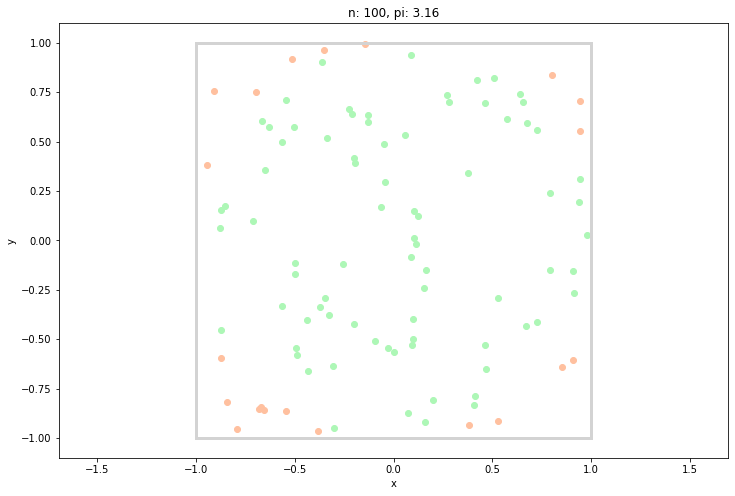

In [12]:
pi_approximate(100)

2.996

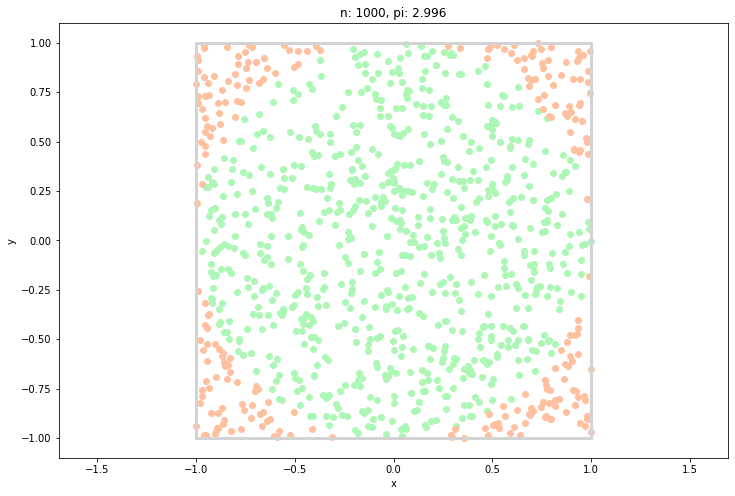

In [13]:
pi_approximate(1000)

3.1536

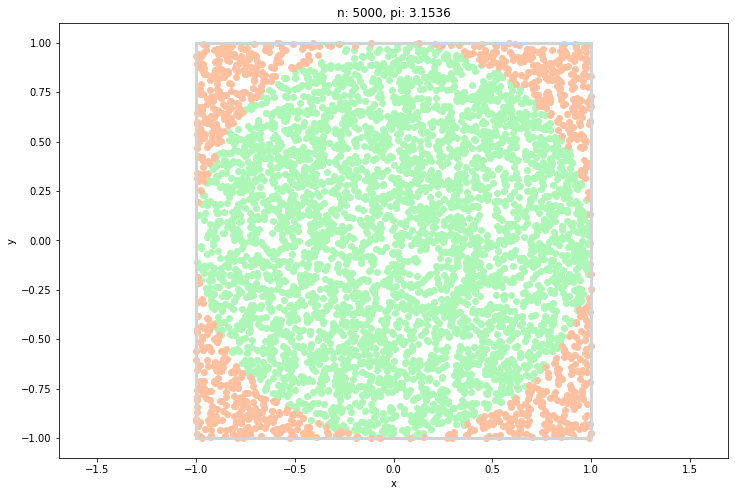

In [14]:
pi_approximate(5000)

<i>Na wykresie przedstaw błąd bezwzględny wraz z rosnącą liczbą punktów użytych w symulacji </i>

In [15]:
def plot_errors():
    errors = []
    ns = list(range(100, 8000, 200))
    for n in ns:
        pi =  pi_approximate(n, plot=False)
        errors.append(abs(np.pi-pi)/np.pi)
    
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.scatter(ns, errors, lw=2, color="#C1666B")
    ax.set_ylabel("error")
    ax.set_xlabel("n")

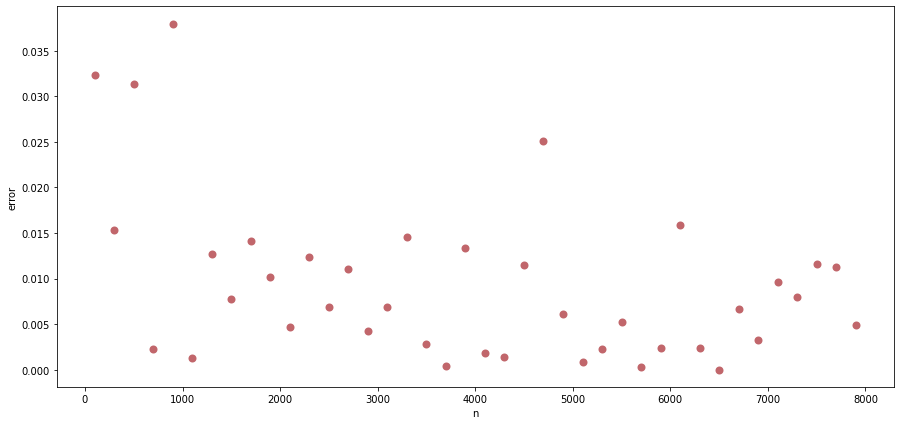

In [16]:
plot_errors()

Możemy zaobserwować ogólny trend zmniejszania wartości błędu, jednak błąd ten nie spada jednostajnie, a oscyluje. Wynika to z natury metody opartej na próbkowaniu, a także z braku możliwości wygenerowania próbek w pełni losowych, jedynie pseudolosowych.

## Wnioski

- Za pomocą różnych algorytmów jesteśmy w stanie generować liczby pseudolosowe o zadanym rozkładzie.
- Metoda Boksa-Mullera pozwala na wygenerowanie zmiennych o rozkładzie normalnym, bez konieczności znajdowania funkcji odwrotnej do dystrybuanty, co w tym przypadku nie jest możliwe analitycznie.
- Test Shapiro-Wilka jest narzędziem do oceny, czy obserwowane lub wygenerowane dane możemy uznać za pochodzące z rozkładu normalnego, a dokładniej, czy możemy odrzucić hipotezę, że pochodzą.
- Metoda Monte Carlo wykorzystuje próbkowanie do estymowania różnych wartości, jest ona obecnie bardzo popularna, wykorzystuje się ją w wielu dziedzinach nauki.

M. Hawryluk 15.06.2021